In [6]:
%matplotlib inline

import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import datetime

sys.path.append("..")

mpl.style.use("classic")
mpl.rcParams["figure.figsize"] = [5, 3]

mpl.rcParams["axes.linewidth"] = 0.75
mpl.rcParams["grid.linewidth"] = 0.75
mpl.rcParams["lines.linewidth"] = 0.75
mpl.rcParams["patch.linewidth"] = 0.75
mpl.rcParams["xtick.major.size"] = 3
mpl.rcParams["ytick.major.size"] = 3

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["font.size"] = 7
mpl.rcParams["axes.titlesize"] = "medium"
mpl.rcParams["legend.fontsize"] = "medium"

print("matplotlib %s" % mpl.__version__)

from bandits.simulator import *
from bandits.algorithms import *
from bandits.phe import *
from bandits.hse import *

def linestyle2dashes(style):
  if style == "--":
    return (3, 3)
  elif style == ":":
    return (0.5, 2.5)
  else:
    return (None, None)

matplotlib 3.2.2


Evaluating HS-SampleWithReplacement.................................................................................................... 3.5 seconds
Regret: 314.80 +/- 45.47 (median: 50.00, max: 2162.00, min: -56.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 98.4 seconds
Regret: 210.59 +/- 35.58 (median: 22.50, max: 1661.00, min: -17.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 95.3 seconds
Regret: 170.49 +/- 29.66 (median: 24.50, max: 1661.00, min: -3.00)
Evaluating HS-SampleWithReplacement.................................................................................................... 96.9 seconds
Regret: 124.05 +/- 23.33 (median: 25.00, max: 1293.00, min: -16.00)
Evaluating HS-SampleWithReplacement...................................................................................................

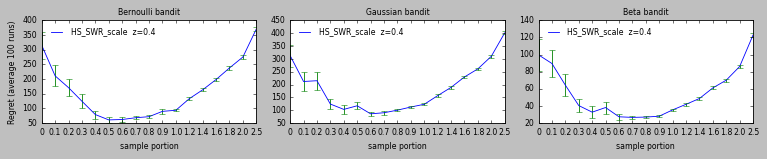

In [4]:
import datetime

sample_portions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                   0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5]
sample_portions_labels = [str(x) for x in sample_portions] 
init_var = 0.4

# sample_portions = [0, 0.1, 0.2, 0.5, 0.7, 1.0]
# sample_portions_labels = ['0', '0.1', '0.2', 
#                           '0.5', '0.7', '1.0'] 

x_axis = np.arange(len(sample_portions))
num_runs = 100
n = 10000
K = 10

plt.figure(figsize=(9.6, 2))
algs = ['HS_SWR_scale']
colors = {'HS_SWR_scale':'red'}

for fig in range(3):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(BerBandit(mu))
    elif fig == 1:
      env.append(GaussBandit(mu))
    else:
      env.append(BetaBandit(mu))

  plt.subplot(1, 3, fig + 1)
  #plt.subplot(1, 1, 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for sample_portion in sample_portions:
        regret, _ = evaluate_parallel(alg_class, 
            {"sample_portion": sample_portion, "z": init_var}, env, n, num_process=13)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), 
             label=alg+'  z='+str(init_var))
    plt.errorbar(x_axis, regret_means, regret_vars, fmt="none")
    plt.xticks(x_axis, sample_portions_labels)
    
  if fig == 0:
    plt.title("Bernoulli bandit")
  elif fig == 1:
    plt.title("Gaussian bandit")
  else:
    plt.title("Beta bandit")
    
  plt.xlabel("sample portion")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../exp_results/HS_SWR_scale_asnoise_init_vs_SamplePortion_{}_{}_{}_{}.jpeg" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="jpeg", bbox_inches=0)
#   plt.savefig(f, format="jpeg", dpi=1200, bbox_inches=0)
plt.show()

Evaluating HS-SampleWithReplacement.................................................................................................... 106.2 seconds
Regret: 330.60 +/- 10.82 (median: 313.77, max: 674.21, min: 60.50)
Evaluating HS-SampleWithReplacement.................................................................................................... 100.8 seconds
Regret: 265.99 +/- 11.94 (median: 253.12, max: 806.99, min: -63.11)
Evaluating HS-SampleWithReplacement.................................................................................................... 101.6 seconds
Regret: 271.32 +/- 11.91 (median: 244.90, max: 724.54, min: 60.24)
Evaluating HS-SampleWithReplacement.................................................................................................... 99.9 seconds
Regret: 256.82 +/- 12.93 (median: 218.73, max: 751.48, min: 20.49)
Evaluating HS-SampleWithReplacement.................................................................................................

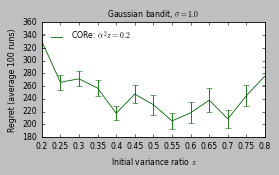

In [11]:
import datetime

init_vars = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, \
             0.65, 0.7, 0.75, 0.8]
init_var_labels = [str(x) for x in init_vars] 

x_axis = np.arange(len(init_vars))
num_runs = 100
n = 10000
K = 10

plt.figure(figsize=(3.5, 2.2))
algs = ['HS_SWR_scale']
colors = {'HS_SWR_scale':'darkgreen'}

for fig in range(1):
  env = []
  for run in range(num_runs):
    mu = 0.5 * np.random.rand(K) + 0.25
    if fig == 0:
      env.append(GaussBandit(mu,sigma=1))

  plt.subplot(1, 1, fig + 1)

  for alg in algs:
    alg_class = globals()[alg]
    regret_means = []
    regret_vars = []
    for init_var in init_vars:
        sample_portion = np.sqrt(1/init_var * 0.2)
        regret, _ = evaluate_parallel(alg_class, 
            {"sample_portion": sample_portion, "z": init_var}, env, n, num_process=13)
        cum_regret = regret.sum(axis=0)
        regret_means.append(cum_regret.mean())
        regret_vars.append(cum_regret.std()/np.sqrt(num_runs))

    plt.plot(x_axis, regret_means, dashes=linestyle2dashes('-'), color='darkgreen',
             label=r'CORe: $\alpha^2z=0.2$')
    plt.errorbar(x_axis, regret_means, regret_vars, ecolor='darkgreen', fmt="none")
    plt.xticks(x_axis, init_var_labels)

  plt.title(r"Gaussian bandit, $\sigma = 1.0$")
  plt.xlabel(r"Initial variance ratio $z$")
  if not fig:
    plt.ylabel("Regret (average {} runs)".format(num_runs))

  if fig <= 2:
    plt.legend(loc="upper left", frameon=False)

plt.tight_layout()
now = datetime.datetime.now()
with open("../aistats_exp_results/core_tune_gauss_{}_{}_{}_{}.pdf" \
          .format(now.month, now.day, now.hour, now.minute), "wb") as f:
    plt.savefig(f, format="pdf", dpi=1200, bbox_inches=0)
plt.show()